Import libraries

In [87]:
import pandas as pd
import numpy as np

Import csv files

In [88]:
# load datasets
train = pd.read_csv('https://raw.githubusercontent.com/ymattu/fashion-mnist-csv/master/fashion_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/ymattu/fashion-mnist-csv/master/fashion_test.csv')

In [89]:
train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V746,V747,V748,V749,V750,V751,V752,V753,V754,V755,V756,V757,V758,V759,V760,V761,V762,V763,V764,V765,V766,V767,V768,V769,V770,V771,V772,V773,V774,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784,y
0,0,0,0,0,0,0,0,0,0,22,88,153,144,157,158,171,174,130,22,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,84,189,209,198,217,...,190,255,235,8,11,28,0,3,0,0,0,0,0,0,0,0,0,0,0,4,99,145,172,161,155,180,189,167,125,49,0,0,1,0,0,3,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,...,0,0,2,0,178,181,220,187,12,0,0,0,0,0,0,0,0,0,2,55,90,11,53,11,0,0,1,0,0,1,0,0,91,97,80,78,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,1,2,0,0,179,182,178,182,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,106,...,173,180,30,0,67,53,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,141,182,176,162,117,178,92,88,151,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,174,204,...,194,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,135,56,0,0,0,64,96,21,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,5,0,0,182,165,163,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
997,0,0,0,0,0,0,0,0,0,0,91,107,0,0,2,0,0,21,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,153,226,247,...,255,214,222,215,55,0,6,0,0,0,0,0,0,0,0,0,1,0,67,149,202,144,241,200,221,255,191,164,239,65,197,195,3,0,3,0,0,0,0,3
998,0,0,0,0,0,0,0,0,0,0,0,51,141,125,112,114,77,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192,255,...,0,0,0,0,197,255,210,0,0,0,0,0,0,0,0,44,225,250,109,0,3,1,4,3,4,2,3,2,2,3,0,0,180,247,210,0,0,0,0,4


In [90]:
test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V746,V747,V748,V749,V750,V751,V752,V753,V754,V755,V756,V757,V758,V759,V760,V761,V762,V763,V764,V765,V766,V767,V768,V769,V770,V771,V772,V773,V774,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784,y
0,0,0,0,0,0,1,3,2,0,0,2,0,0,0,0,0,0,0,0,0,4,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,46,145,199,177,...,191,171,69,10,215,201,102,0,0,0,0,0,0,0,0,0,24,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135,117,25,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,11,107,6,0,0,0,0,0,3,69,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,49,68,83,215,210,...,0,0,1,0,0,218,221,211,0,0,0,0,0,0,14,107,143,17,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,147,162,104,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,87,78,0,0,0,0,141,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,207,225,229,...,227,221,230,189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,125,137,160,137,114,123,120,101,58,20,3,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,69,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,185,207,89,0,...,232,232,236,247,238,255,76,0,0,0,0,0,0,0,0,1,0,14,126,122,165,193,210,226,234,233,233,236,234,229,229,215,175,145,5,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,72,46,54,50,50,40,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
996,0,0,0,0,0,0,0,36,99,79,32,12,8,8,7,7,1,79,147,113,86,29,0,0,0,0,0,0,0,0,0,0,11,82,126,135,138,123,130,134,...,79,78,74,100,81,21,142,84,71,105,60,81,107,96,86,67,18,147,113,98,93,95,93,89,85,81,81,79,74,68,72,82,60,9,126,102,85,95,42,2
997,0,0,0,0,0,0,0,0,0,0,0,18,73,71,62,58,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,151,...,0,0,0,0,163,187,53,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,3,4,5,4,3,3,3,3,0,0,0,0,0,0,0,0,0,4
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


Append datasets

In [91]:
train = train.append(test).reset_index()
train

,index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,...,V746,V747,V748,V749,V750,V751,V752,V753,V754,V755,V756,V757,V758,V759,V760,V761,V762,V763,V764,V765,V766,V767,V768,V769,V770,V771,V772,V773,V774,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784,y
0,0,0,0,0,0,0,0,0,0,0,22,88,153,144,157,158,171,174,130,22,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,84,189,209,198,...,190,255,235,8,11,28,0,3,0,0,0,0,0,0,0,0,0,0,0,4,99,145,172,161,155,180,189,167,125,49,0,0,1,0,0,3,0,0,0,6
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,...,0,0,2,0,178,181,220,187,12,0,0,0,0,0,0,0,0,0,2,55,90,11,53,11,0,0,1,0,0,1,0,0,91,97,80,78,0,0,0,9
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
3,3,0,0,0,0,0,0,0,0,1,2,0,0,179,182,178,182,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,...,173,180,30,0,67,53,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,4,0,0,0,0,0,0,0,0,0,0,141,182,176,162,117,178,92,88,151,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,174,...,194,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,135,56,0,0,0,64,96,21,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,72,46,54,50,50,40,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1996,996,0,0,0,0,0,0,0,36,99,79,32,12,8,8,7,7,1,79,147,113,86,29,0,0,0,0,0,0,0,0,0,0,11,82,126,135,138,123,130,...,79,78,74,100,81,21,142,84,71,105,60,81,107,96,86,67,18,147,113,98,93,95,93,89,85,81,81,79,74,68,72,82,60,9,126,102,85,95,42,2
1997,997,0,0,0,0,0,0,0,0,0,0,0,18,73,71,62,58,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,163,187,53,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,3,4,5,4,3,3,3,3,0,0,0,0,0,0,0,0,0,4
1998,998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 786 entries, index to y
dtypes: int64(786)
memory usage: 12.0 MB


Check for null values

In [93]:
train.isnull().sum().sum()

0

Define X and y values

In [94]:
y = train.y
X = train.drop(["index", "y"], axis=1)

In [95]:
y

0       6
1       9
2       9
3       4
4       1
       ..
1995    9
1996    2
1997    4
1998    5
1999    5
Name: y, Length: 2000, dtype: int64

In [96]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V745,V746,V747,V748,V749,V750,V751,V752,V753,V754,V755,V756,V757,V758,V759,V760,V761,V762,V763,V764,V765,V766,V767,V768,V769,V770,V771,V772,V773,V774,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
0,0,0,0,0,0,0,0,0,0,22,88,153,144,157,158,171,174,130,22,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,84,189,209,198,217,...,165,190,255,235,8,11,28,0,3,0,0,0,0,0,0,0,0,0,0,0,4,99,145,172,161,155,180,189,167,125,49,0,0,1,0,0,3,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,...,4,0,0,2,0,178,181,220,187,12,0,0,0,0,0,0,0,0,0,2,55,90,11,53,11,0,0,1,0,0,1,0,0,91,97,80,78,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,2,0,0,179,182,178,182,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,106,...,213,173,180,30,0,67,53,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,141,182,176,162,117,178,92,88,151,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,174,204,...,192,194,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,135,56,0,0,0,64,96,21,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,72,46,54,50,50,40,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,36,99,79,32,12,8,8,7,7,1,79,147,113,86,29,0,0,0,0,0,0,0,0,0,0,11,82,126,135,138,123,130,134,...,77,79,78,74,100,81,21,142,84,71,105,60,81,107,96,86,67,18,147,113,98,93,95,93,89,85,81,81,79,74,68,72,82,60,9,126,102,85,95,42
1997,0,0,0,0,0,0,0,0,0,0,0,18,73,71,62,58,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,151,...,0,0,0,0,0,163,187,53,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,3,4,5,4,3,3,3,3,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Scale data

In [97]:
#the MNIST dataset has images with pixel values in the range [0, 255]
X = X / 255

Split X for training and validation

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1800, 784), (200, 784), (1800,), (200,))

Define model

In [99]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=100, alpha=1e-4, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1).fit(X_train, y_train)
print(model.score(X_train, y_train))

Iteration 1, loss = 1.57847036
Iteration 2, loss = 0.82376147
Iteration 3, loss = 0.68859478
Iteration 4, loss = 0.56111064
Iteration 5, loss = 0.53174043
Iteration 6, loss = 0.45162573
Iteration 7, loss = 0.42689653
Iteration 8, loss = 0.38825411
Iteration 9, loss = 0.42339191
Iteration 10, loss = 0.35099026
Iteration 11, loss = 0.34000304
Iteration 12, loss = 0.30355836
Iteration 13, loss = 0.30424257
Iteration 14, loss = 0.26342162
Iteration 15, loss = 0.29657343
Iteration 16, loss = 0.24207078
Iteration 17, loss = 0.23028445
Iteration 18, loss = 0.26733202
Iteration 19, loss = 0.23015582
Iteration 20, loss = 0.19979610
Iteration 21, loss = 0.19256645
Iteration 22, loss = 0.17831659
Iteration 23, loss = 0.14466482
Iteration 24, loss = 0.14297053
Iteration 25, loss = 0.14780618
Iteration 26, loss = 0.18501875
Iteration 27, loss = 0.14587808
Iteration 28, loss = 0.13095952
Iteration 29, loss = 0.12483629
Iteration 30, loss = 0.12739761
Iteration 31, loss = 0.08666627
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Predict on validation set

In [100]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.825


In [101]:
print(f"Training set score: {model.score(X_train, y_train):.3f}")
print(f"Validation set score: {model.score(X_val, y_val):.3f}")

Training set score: 1.000
Validation set score: 0.825


In [102]:
df_val=pd.DataFrame({'actual_value': y_val, 'predicted_value':y_pred})
df_val.reset_index(drop=True, inplace=True)
df_val

,actual_value,predicted_value
0,0,0
1,2,2
2,4,4
3,9,9
4,2,2
...,...,...
195,8,8
196,5,5
197,0,0
198,8,8


Graphics

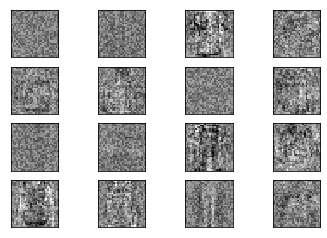

In [103]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = model.coefs_[0].min(), model.coefs_[0].max()
for coef, ax in zip(model.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()